In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
"""
리뷰 사이트인 yelp의 text review 데이터를 사용하여 sentiment analysis 수행
"""
# 데이터 로드
yelp = pd.read_csv('yelp.csv')

# 사이즈 확인
yelp.shape

(10000, 10)

In [4]:
# 상위 4개 데이터 확인
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
# 자료 구조 확인
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
# 기초 통계 확인
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
# 텍스트 길이에 대한 정보 추가
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## 데이터 살펴보기


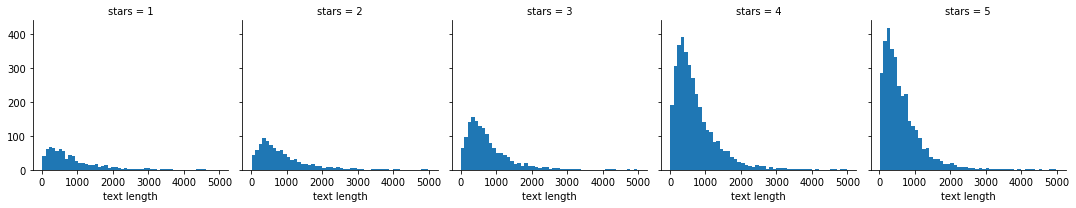

In [8]:
# 별점에 따른 텍스트 길이 시각화 
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='stars', ylabel='text length'>

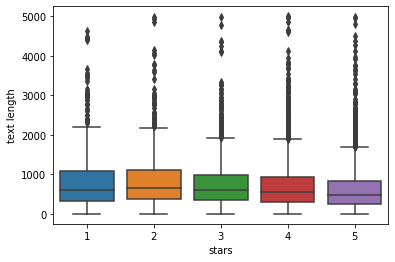

In [9]:
# 별점에 따른 텍스트 길이 boxplot으로 시각화
sns.boxplot(x='stars', y='text length', data=yelp)

In [10]:
# 위의 시각화를 통해 텍스트 길이와 별점은 별 상관 관계가 없다는 사실을 확인할 수 있음
# 그 대신 텍스트 길이와 다른 user의 그 리뷰에 대한 평가 (cool, useful, funny)의 상관 관계를 보자

In [11]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


In [12]:
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot:>

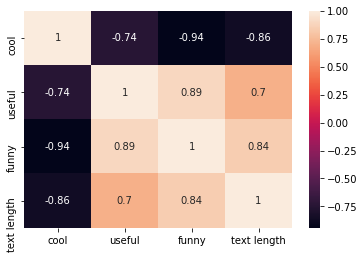

In [13]:
# heatmap을 이용하여 시각화
sns.heatmap(data=stars.corr(), annot=True)

In [14]:
# funny는 useful가 상관관계가 높고, 텍스트 길이는 funny 상관관계가 높다 (useful도 어느 정도는)
# cool은 다른 세개의 속성값과 음의 상관관계가 있음

## 분석할 X(입력값), y(출력값) 선정 

In [17]:
# 우리의 목적은 리뷰 텍스트를 분석하여 이 리뷰의 긍정인지 부정인지를 예측하는 것
# 긍/부정의 근거로 별점이 5이거나 1인 리뷰만을 선택하도록 함
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(4086, 11)

In [19]:
# X는 텍스트, y는 별점
X = yelp_class['text']
y = yelp_class['stars']

In [27]:
len(X)

4086

In [29]:
len(y)

4086

## 텍스트 전처리 

In [30]:
# 텍스트 전처리 함수

import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    result = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    
    return result



In [31]:
# 전처리 함수 테스트
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


## 문서 벡터화

In [32]:
# sklearn의 CountVectorizer 함수 사용, bow(bag of words)로 변환하는 객체 생성
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [33]:
# 단어 사전 크기 확인
len(bow_transformer.vocabulary_)

21912

In [34]:
# 리뷰 문서 확인
review_25 = X[24]
review_25

"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [35]:
# review_25 변환
bow_25 = bow_transformer.transform([review_25])
print(bow_25)

  (0, 729)	1
  (0, 994)	1
  (0, 1191)	1
  (0, 1609)	1
  (0, 1741)	1
  (0, 3141)	1
  (0, 3895)	4
  (0, 3952)	1
  (0, 4420)	1
  (0, 4786)	1
  (0, 6066)	1
  (0, 6304)	1
  (0, 6701)	1
  (0, 7406)	1
  (0, 8210)	1
  (0, 9697)	1
  (0, 11540)	1
  (0, 11711)	1
  (0, 14378)	1
  (0, 14700)	1
  (0, 16767)	3
  (0, 19936)	1
  (0, 21460)	1


In [36]:
# 이 리뷰에서 세번 등장하는 16767 과 네번 등장하는 3895를 확인해보자.
print(bow_transformer.get_feature_names()[16767])
print(bow_transformer.get_feature_names()[3895])

sandwich
chicken


In [37]:
# 이제 X를 변형
X = bow_transformer.transform(X)

In [38]:
# X 확인
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# 0이 아닌 값의 비율
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (4086, 21912)
Amount of Non-Zero occurrences:  219329
Density: 0.2449715651642301


## Training

In [39]:
# training data, test data 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [42]:
y_train

3608    5
2397    5
6066    5
7366    1
5888    5
       ..
3902    5
9570    5
3333    5
3781    5
2071    5
Name: stars, Length: 2860, dtype: int64

In [41]:
# test, evaluation
preds = nb.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[166  62]
 [ 28 970]]


              precision    recall  f1-score   support

           1       0.86      0.73      0.79       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## 개별 리뷰 테스트

In [44]:
# 긍정 리뷰
a_review = yelp_class['text'][59]
a_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [47]:
a_review_transformed = bow_transformer.transform([a_review])
nb.predict(a_review_transformed)[0]

5

In [50]:
# 부정 리뷰
#another_review = yelp_class['text'][281]
another_review ="""
Was recommended to this place by someone and had high hopes and expectation. However, to my great disappointment, the reception we got was super bad. Attitude of cashier (maybe the owner) was very hostile. Spent more time on the phone than taking our order. Moreover, this place is quite rundown. Hope of anything good went down then drain when our food was served. Portion very small. Just a few pathetic slices of meat, and some rice in soup. For USD12.00, it's extremely overpriced. Soup was not hot as well. An experience definitely to be forgotten and to warn future hopeful to avoid his place altogether.
"""
another_review

"\nWas recommended to this place by someone and had high hopes and expectation. However, to my great disappointment, the reception we got was super bad. Attitude of cashier (maybe the owner) was very hostile. Spent more time on the phone than taking our order. Moreover, this place is quite rundown. Hope of anything good went down then drain when our food was served. Portion very small. Just a few pathetic slices of meat, and some rice in soup. For USD12.00, it's extremely overpriced. Soup was not hot as well. An experience definitely to be forgotten and to warn future hopeful to avoid his place altogether.\n"

In [51]:
another_review_transformed = bow_transformer.transform([another_review])
nb.predict(another_review_transformed)[0]

1

In [52]:
# 잘못 맞춘 리뷰
diff_review = yelp_class['text'][140]
diff_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [53]:
diff_review_transformed = bow_transformer.transform([diff_review])
nb.predict(diff_review_transformed)[0]

5